# Let's try to read in our FRAP data and generate some plots

In [17]:
from os import listdir

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

from scipy import optimize

In [2]:
#Define the folder containing your file of interest,
#Currently this is './' the current folder
Exp002_folder = "C:/Users/David Brown/Documents/Huang Lab/EML4-ALK_FRAP_Exp002_Results/"
Exp003_folder = "C:/Users/David Brown/Documents/Huang Lab/EML4-ALK_FRAP_Exp003_Results/"
Exp004_folder = "C:/Users/David Brown/Documents/Huang Lab/EML4-ALK_FRAP_Exp004_Results/"

In [3]:
Exp002_files = listdir(Exp002_folder)
# Exp002_files

In [4]:
Exp003_files = listdir(Exp003_folder)
# Exp003_files

In [5]:
Exp004_files = listdir(Exp004_folder)
# Exp004_files

We need a function to generate a FRAP plot

In [6]:
def getdata(input_folder, file_index):
    
    files = listdir(input_folder)
    file  = files[file_index]
    
    df = pd.read_csv(input_folder+file)

    names = list(df.columns)
    names[0]='Frame'
    names

    df.columns = names
    
    return df, file

In [ ]:
#Read all the data into a list of dataframes.

#Or one big dataframe (easier to save)

In [10]:
df_list = list()
file_list = list()

for input_folder in [Exp002_folder, Exp003_folder, Exp004_folder]:
    files = listdir(input_folder)
    
    for file_index in range(len(files)):
        
#         print('Reading ', file_index, 'from ', input_folder)
        
        df, file = getdata(input_folder, file_index)
        
        df_list.append(df)
        file_list.append(file)

In [39]:
file_list

['EML4-ALKv1_FRAP_10_Results.csv',
 'EML4-ALKv1_FRAP_11_Results.csv',
 'EML4-ALKv1_FRAP_12_Results.csv',
 'EML4-ALKv1_FRAP_13_Results.csv',
 'EML4-ALKv1_FRAP_14_Results.csv',
 'EML4-ALKv1_FRAP_16_Results.csv',
 'EML4-ALKv1_FRAP_1_Results.csv',
 'EML4-ALKv1_FRAP_2_Results.csv',
 'EML4-ALKv1_FRAP_3_Results.csv',
 'EML4-ALKv1_FRAP_4_Results.csv',
 'EML4-ALKv1_FRAP_5_Results.csv',
 'EML4-ALKv1_FRAP_6_Results.csv',
 'EML4-ALKv1_FRAP_8_Results.csv',
 'EML4-ALKv1_FRAP_9_Results.csv',
 'EML4-ALKv3_FRAP_10_Box1_Results.csv',
 'EML4-ALKv3_FRAP_2_Box1_Results.csv',
 'EML4-ALKv3_FRAP_3_Box1_Results.csv',
 'EML4-ALKv3_FRAP_5_Box1_Results.csv',
 'EML4-ALKv3_FRAP_6_Box1_Results.csv',
 'EML4-ALKv3_FRAP_7_Box1_Results.csv',
 'EML4-ALKv3_FRAP_8_Box1_Results.csv',
 'EML4-ALKv3_FRAP_9_Box1_Results.csv',
 'EML4-ALKv5_FRAP_1_Results.csv',
 'Ret_FRAP_1_Results.csv',
 'Ret_FRAP_2_Results.csv',
 'Ret_FRAP_3_Results.csv',
 'Ret_FRAP_4_Results.csv',
 'EML4-ALKv1_fixed_FRAP_1_Results.csv',
 'EML4-ALKv1_fixed_FRAP

In [7]:
def getFileInfo(filelist, **kwargs)->pd.DataFrame():
    """strip some information from the input file name"""
    
    #Get **kwargs
    search_list = kwargs.get('search_list', None)
    
    file_info = pd.DataFrame()
    
    #convert to lower case
    low_files = [file.lower() for file in filelist]
    
    file_info['File']     = range(len(filelist))
    file_info['ALKv1']    = ['alkv1'    in file for file in low_files]
    file_info['ALKv3']    = ['alkv3'    in file for file in low_files]
    file_info['ALKv5']    = ['alkv5'    in file for file in low_files]
    file_info['Ret']      = ['ret'      in file for file in low_files]
    
    if search_list is not None:
        
        for term in search_list:
            file_info[term] = [term.lower() in file for file in low_files]
    
    return file_info

In [8]:
def combineClassifiers(data, input_columns, output_column, drop=False):
    """Combine mutually exclusive input_columns into a single catagorical output column."""
    
    data[output_column] = data[input_columns].idxmax(axis=1)
    
    if drop:
        data.drop(columns=input_columns, inplace=True)
        
    return data

In [11]:
file_info = getFileInfo(file_list, search_list = ['Fixed'])
file_info

,File,ALKv1,ALKv3,ALKv5,Ret,Fixed
0,0,True,False,False,False,False
1,1,True,False,False,False,False
2,2,True,False,False,False,False
3,3,True,False,False,False,False
4,4,True,False,False,False,False
...,...,...,...,...,...,...
81,81,False,False,False,True,False
82,82,False,False,False,True,False
83,83,False,False,False,True,False
84,84,False,False,False,True,False


In [12]:
combineClassifiers(file_info, ['ALKv1','ALKv3','ALKv5','Ret'], 'Protein', drop=True)

,File,Fixed,Protein
0,0,False,ALKv1
1,1,False,ALKv1
2,2,False,ALKv1
3,3,False,ALKv1
4,4,False,ALKv1
...,...,...,...
81,81,False,Ret
82,82,False,Ret
83,83,False,Ret
84,84,False,Ret


In [14]:
#Get Bleach Frame

In [15]:
# Let's generate a list of t0 frames for these files.
t0_frames = [12]*len(file_list)

# We can edit the files with distinct t0 frames.
t0_frames[10]=13
t0_frames[16]=9
t0_frames[21]=10
t0_frames[23]=20

t0_frames[33] = 13
t0_frames[38] = 12

t0_frames[54] = 16
t0_frames[62] = 11
t0_frames[63] = 13
t0_frames[66] = 13
t0_frames[71] = 11
t0_frames[79] = 13
t0_frames[80] = 13

file_info['Bleach Frame']          = t0_frames

In [16]:
# Set Experiment
file_info['Experiment']            = 'Exp002'
file_info.loc[27:53, 'Experiment'] = 'Exp003'
file_info.loc[53:, 'Experiment']   = 'Exp004'

file_info['Filename'] = file_list
file_info

,File,Fixed,Protein,Bleach Frame,Experiment,Filename
0,0,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_10_Results.csv
1,1,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_11_Results.csv
2,2,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_12_Results.csv
3,3,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_13_Results.csv
4,4,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_14_Results.csv
...,...,...,...,...,...,...
81,81,False,Ret,12,Exp004,Ret_FRAP_01_Results.csv
82,82,False,Ret,12,Exp004,Ret_FRAP_02_Results.csv
83,83,False,Ret,12,Exp004,Ret_FRAP_03_Results.csv
84,84,False,Ret,12,Exp004,Ret_FRAP_04_Results.csv


In [118]:
## File Info Looks Good ##

In [18]:
# Save locally
# file_info.to_pickle("C:/Users/David Brown/Documents/Huang Lab/EML4-ALK_1fps_FRAP_fileinfo.pkl")

In [ ]:
# Load locally
file_info = pd.read_pickle("C:/Users/David Brown/Documents/Huang Lab/EML4-ALK_1fps_FRAP_fileinfo.pkl")

In [ ]:
# Get pre, post and final data for these files

In [19]:
def prebleach(df):
    
    pre = df.iloc[0:7,1:].mean()
    pre = pd.DataFrame(pre).T
    
    return pre

In [20]:
def postbleach(df, t0):
    
    post = df.iloc[t0, 1:]
    post = pd.DataFrame(post).T
    
    return post

In [21]:
def final(df):
    
    final = df.iloc[90:,1:].mean()
    final = pd.DataFrame(final).T
    
    return final

In [22]:
prebleach_values = list()

for df in df_list:
    pre = prebleach(df)
    
    prebleach_values.append(prebleach(df))
    
prebleach_values = pd.concat(prebleach_values, sort=False)
prebleach_values.reset_index(inplace=True, drop=True)
prebleach_values

,Mean(Focus),Mean(Spot),Mean(Control_Focus),Mean(Control_Spot),Mean(Bgd)
0,267.144429,127.203571,400.106000,124.434571,113.675714
1,189.503714,122.808286,205.458000,120.193286,114.210000
2,241.954571,142.179286,209.415143,140.734000,113.343143
3,164.263714,155.141429,239.760000,177.461286,114.471429
4,1389.321286,216.406714,2070.260714,274.183714,115.136429
...,...,...,...,...,...
81,162.902714,150.084571,NaN,NaN,114.808714
82,1088.525714,620.997143,NaN,NaN,117.968857
83,139.413857,131.158000,NaN,NaN,114.725429
84,178.115000,162.712000,NaN,NaN,114.268143


In [23]:
t0_values = list()

for n, df in enumerate(df_list):
    
    t0_values.append(postbleach(df, t0_frames[n]))
    
t0_values = pd.concat(t0_values, sort=False)
t0_values.reset_index(inplace=True, drop=True)
t0_values

,Mean(Focus),Mean(Spot),Mean(Control_Focus),Mean(Control_Spot),Mean(Bgd)
0,118.887,117.495,369.546,121.847,113.427
1,117.021,116.505,209.340,119.582,113.898
2,122.711,120.372,205.216,140.051,112.898
3,127.268,125.372,254.258,173.531,114.410
4,149.237,135.179,1963.814,256.643,115.454
...,...,...,...,...,...
81,137.113,134.648,NaN,NaN,114.314
82,464.351,417.276,NaN,NaN,117.348
83,125.278,125.582,NaN,NaN,114.744
84,159.639,147.821,NaN,NaN,114.212


In [24]:
final_values = list()

for n, df in enumerate(df_list):
  
    final_values.append(final(df))
    
final_values = pd.concat(final_values, sort=False)
final_values.reset_index(inplace=True, drop=True)
final_values

,Mean(Focus),Mean(Spot),Mean(Control_Focus),Mean(Control_Spot),Mean(Bgd)
0,131.8733,122.6755,371.7886,122.1394,113.7314
1,125.1556,121.0515,200.3225,119.1204,114.2656
2,150.5979,136.6729,190.3453,134.8643,113.1130
3,144.7248,138.5619,249.9372,169.7101,114.6555
4,246.6826,164.8087,1567.8908,586.5994,115.4462
...,...,...,...,...,...
81,138.8629,139.2020,NaN,NaN,114.9029
82,577.6679,495.2831,NaN,NaN,119.0059
83,126.4753,128.7873,NaN,NaN,114.2459
84,154.2556,153.4887,NaN,NaN,114.1003


In [153]:
# Combine initial, t0 and final dataframes into one.

In [154]:
# First, rename the columns (we want them in thr right order too)

In [25]:
prebleach_values.columns = ['Initial_Focus',
                            'Initial_Spot',
                            'Initial_Control_Focus',
                            'Initial_Control_Spot',
                            'Initial_Background']

In [26]:
t0_values.columns = ['t0_Focus',
                     't0_Spot',
                     't0_Control_Focus',
                     't0_Control_Spot',
                     't0_Background']

In [27]:
final_values.columns = ['Final_Focus',
                        'Final_Spot',
                        'Final_Control_Focus',
                        'Final_Control_Spot',
                        'Final_Background']

In [28]:
combined_df = pd.concat([file_info, prebleach_values, t0_values, final_values], axis=1)
combined_df

,File,Fixed,Protein,Bleach Frame,Experiment,Filename,Initial_Focus,Initial_Spot,Initial_Control_Focus,Initial_Control_Spot,...,t0_Focus,t0_Spot,t0_Control_Focus,t0_Control_Spot,t0_Background,Final_Focus,Final_Spot,Final_Control_Focus,Final_Control_Spot,Final_Background
0,0,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_10_Results.csv,267.144429,127.203571,400.106000,124.434571,...,118.887,117.495,369.546,121.847,113.427,131.8733,122.6755,371.7886,122.1394,113.7314
1,1,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_11_Results.csv,189.503714,122.808286,205.458000,120.193286,...,117.021,116.505,209.340,119.582,113.898,125.1556,121.0515,200.3225,119.1204,114.2656
2,2,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_12_Results.csv,241.954571,142.179286,209.415143,140.734000,...,122.711,120.372,205.216,140.051,112.898,150.5979,136.6729,190.3453,134.8643,113.1130
3,3,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_13_Results.csv,164.263714,155.141429,239.760000,177.461286,...,127.268,125.372,254.258,173.531,114.410,144.7248,138.5619,249.9372,169.7101,114.6555
4,4,False,ALKv1,12,Exp002,EML4-ALKv1_FRAP_14_Results.csv,1389.321286,216.406714,2070.260714,274.183714,...,149.237,135.179,1963.814,256.643,115.454,246.6826,164.8087,1567.8908,586.5994,115.4462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,81,False,Ret,12,Exp004,Ret_FRAP_01_Results.csv,162.902714,150.084571,NaN,NaN,...,137.113,134.648,NaN,NaN,114.314,138.8629,139.2020,NaN,NaN,114.9029
82,82,False,Ret,12,Exp004,Ret_FRAP_02_Results.csv,1088.525714,620.997143,NaN,NaN,...,464.351,417.276,NaN,NaN,117.348,577.6679,495.2831,NaN,NaN,119.0059
83,83,False,Ret,12,Exp004,Ret_FRAP_03_Results.csv,139.413857,131.158000,NaN,NaN,...,125.278,125.582,NaN,NaN,114.744,126.4753,128.7873,NaN,NaN,114.2459
84,84,False,Ret,12,Exp004,Ret_FRAP_04_Results.csv,178.115000,162.712000,NaN,NaN,...,159.639,147.821,NaN,NaN,114.212,154.2556,153.4887,NaN,NaN,114.1003


In [38]:
# Save locally
# combined_df.to_pickle("C:/Users/David Brown/Documents/Huang Lab/EML4-ALK_1fps_FRAP_combined_df.pkl")

In [ ]:
# Load locally
combined_df = pd.read_pickle("C:/Users/David Brown/Documents/Huang Lab/EML4-ALK_1fps_FRAP_combined_df.pkl")

In [39]:
def subtract_background(df):
    
    sub = df.subtract(df['Mean(Bgd)'], axis=0)
    sub.Frame = df.Frame
    sub.drop(columns='Mean(Bgd)', inplace=True)
    return sub

In [40]:
def normalise(sub):
    
    pre = prebleach(sub)
    
    norm = pd.DataFrame()

    for key, value in pre.to_dict(orient='index')[0].items():
    #     print(key, value)

        norm[str(key)] = sub.loc[:, key].divide(value)

    norm['Frame'] = sub['Frame']
    
    return norm

In [41]:
def get_FRAP(norm, ROI, t0):
    
    FRAP = norm[t0:].copy()
    FRAP['Time'] = (FRAP['Frame']-t0)
    
    return FRAP

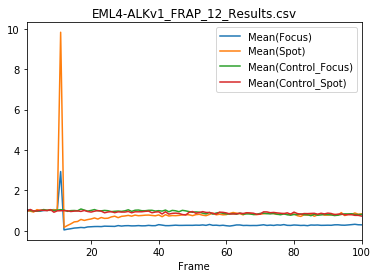

In [42]:
df_index = 2

df = df_list[df_index]
title = file_list[df_index]

sub = subtract_background(df)
norm = normalise(sub)

norm.plot(x='Frame');
plt.title(title);

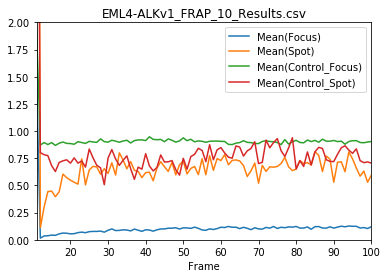

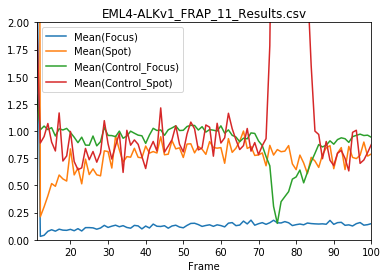

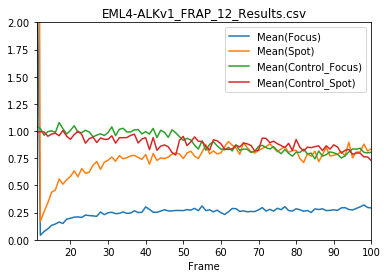

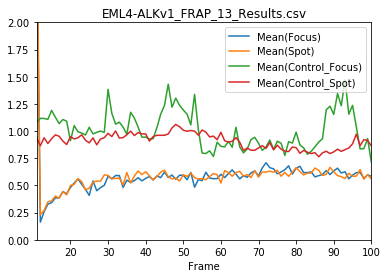

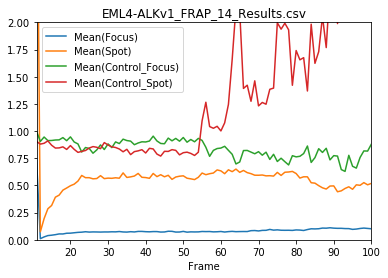

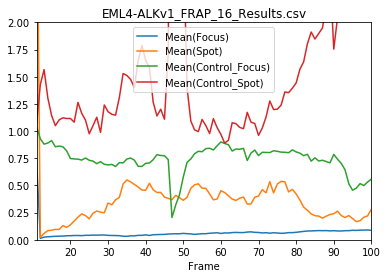

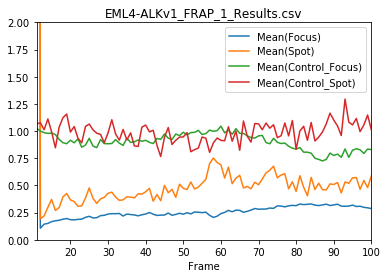

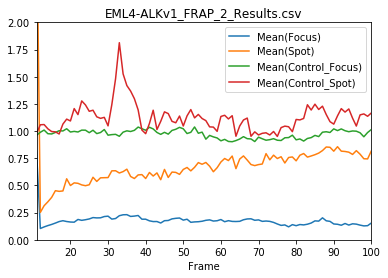

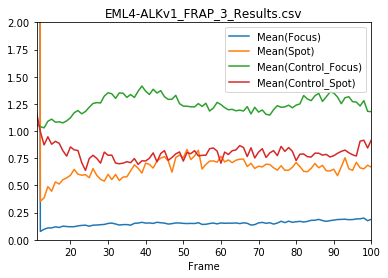

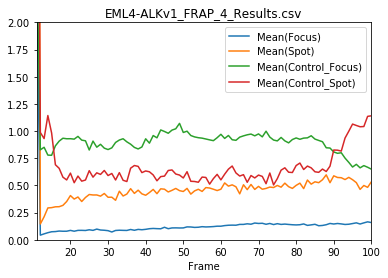

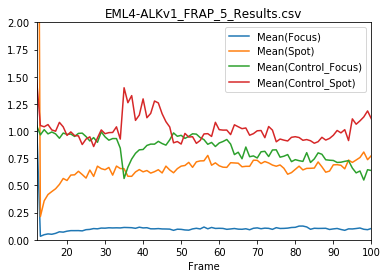

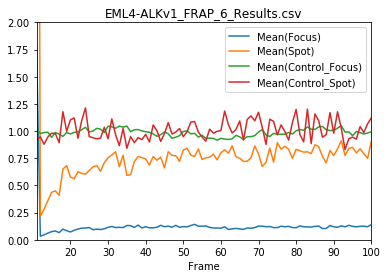

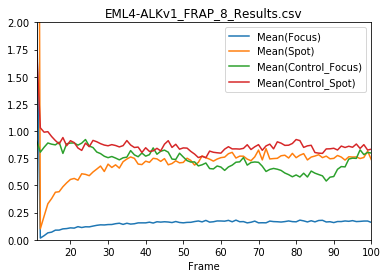

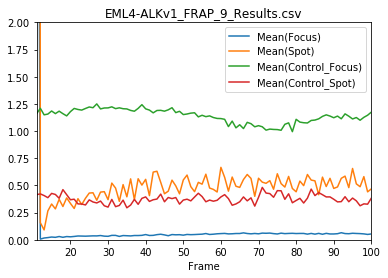

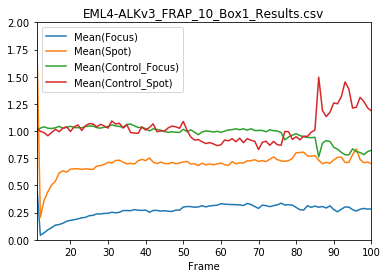

In [44]:
# Limit y to the recovery stage

for df_index in range(15):

    df    = df_list[df_index]
    title = file_list[df_index]
    t0    = t0_frames[df_index]

    sub = subtract_background(df)
    norm = normalise(sub)

    norm.plot(x='Frame');
    plt.title(title);
    plt.ylim(0,2);
    plt.xlim(t0-1, 100)

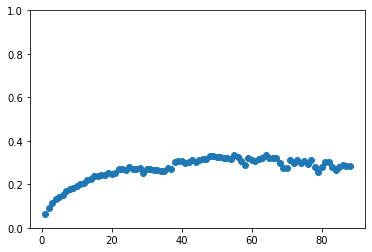

In [46]:
ROI = 'Mean(Focus)'

FRAP = norm[t0:].copy()
FRAP['Time'] = (FRAP['Frame']-t0)
plt.scatter(x=FRAP['Time'], y=FRAP[ROI]);
plt.ylim(0,1);

In [54]:
# Get plateau and mobile fraction
v = pd.DataFrame(FRAP.iloc[-10:,:].mean(axis=0)).T.reset_index(drop=True)

# Get F0
F0 = pd.DataFrame(FRAP.iloc[0,:]).T.reset_index(drop=True)

v.subtract(F0, axis=1)

# Mobile Fraction 
M = (v.subtract(F0)).divide(1-F0)
M

# IF THESE TRAITS ARE INTERESTING A FUNCTION CAN ADD THEM TO THE COMBINED_DF

,Mean(Focus),Mean(Spot),Mean(Control_Focus),Mean(Control_Spot),Frame,Time
0,0.232185,0.595681,5.90954,21.074263,-6.875,inf


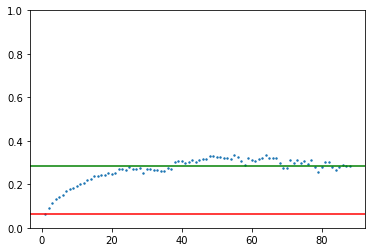

In [59]:
ROI = 'Mean(Focus)'

FRAP = norm[t0:].copy()
FRAP['Time'] = (FRAP['Frame']-t0)
plt.scatter(x=FRAP['Time'], y=FRAP[ROI], s=2);
plt.ylim(0,1);
plt.axhline(F0[ROI].values[0], c='r');
plt.axhline(v[ROI].values[0], c='g');

In [225]:
# Fit the curves

In [60]:
#Defaults
A = 0.4
B = 0.3
c = 0.1
d = 100
h = float(v[ROI])

In [61]:
h

0.2819858811563623

In [62]:
x = FRAP['Time']
y0 = FRAP[ROI]

In [63]:
def exp_curve(x, A, c, h):
    
    y = h - A*(np.exp(-x/c))
    
    return y

In [64]:
def bi_exp_curve(x, A, B, c, d, h):
    
    y = h - A*(np.exp(-x/c))-B*(np.exp(-x/d))
    
    return y

In [72]:
def fit_exp(x, y0, p0, bounds):

    p , e = optimize.curve_fit(f = exp_curve, xdata=FRAP['Time'], ydata=FRAP[ROI], p0=p0, bounds=bounds)

    A, c, h = p

    fit = exp_curve(x, A, c, h)

    return fit, p, e

In [73]:
# Fit bi exp
def fit_bi_exp(x, y0, p0, bounds):

    p , e = optimize.curve_fit(f = bi_exp_curve, xdata=FRAP['Time'], ydata=FRAP[ROI], p0=p0, bounds=bounds)

    A, B, c, d, h = p

    fit = bi_exp_curve(x, A, B, c, d, h)
    
    return fit, p, e

In [74]:
# Compare fits
def compare_fits(FRAP, ROI):
       
    x = FRAP['Time']
    y0 = FRAP[ROI]

    plt.scatter(x, y0);

    A= 0.7
    c= 0.6
    h= 0.24

    p0 = [A, c, h]
    bounds = (0.1, 0.1, 0), (1, 90, 1)

    y1, p, e = fit_exp(x, y0, p0, bounds)

    plt.plot(x, y1);

    p0 = [A, B, c, d, h]
    bounds = (0.1, 0.01, 0, 0, 0.01), (1, 1, 100, 100, 1)

    y2, p, e = fit_bi_exp(x, y0, p0, bounds)

    plt.plot(x, y2);

In [ ]:
# Fit the curves

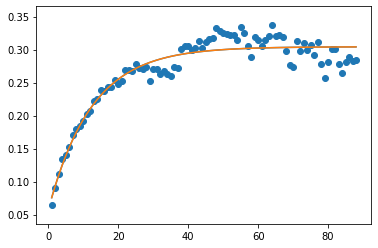

In [75]:
compare_fits(FRAP, ROI)

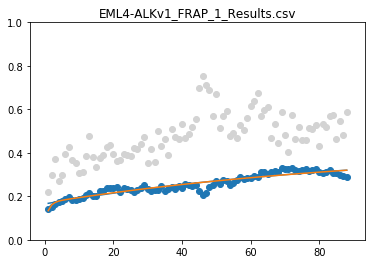

In [77]:
#What about when I change the df?
df_index = 6
df    = df_list[df_index]
title = file_list[df_index]
t0    = t0_frames[df_index]

sub = subtract_background(df)
norm = normalise(sub)
FRAP = get_FRAP(norm, ROI, t0)

compare_fits(FRAP, ROI)
plt.scatter(FRAP['Time'], FRAP['Mean(Spot)'], c='lightgrey')
plt.title(title);
plt.ylim(0,1);

In [572]:
A, B, c, d, h = p

In [573]:
fit = bi_exp_fit(x, A, B, c, d, h)

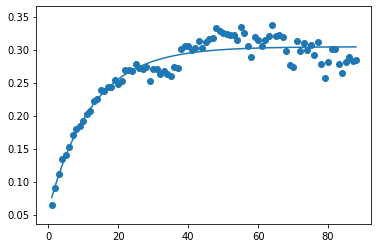

In [574]:
plt.scatter(x,y0);
plt.plot(x, fit);

In [415]:
y = h-A*exp(-x/c)-B*exp(-x/d)

In [402]:
x = FRAP['Time']

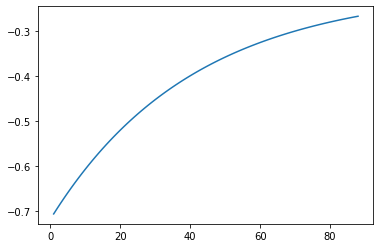

In [416]:
plt.plot(x, y);

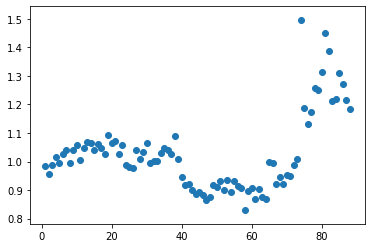

In [360]:
ROI = 'Mean(Control_Spot)'

FRAP = norm[t0:].copy()
FRAP['Time'] = (FRAP['Frame']-t0)
plt.scatter(x=FRAP['Time'], y=FRAP[ROI]);

In [364]:
# How do our cells photobleach over time?

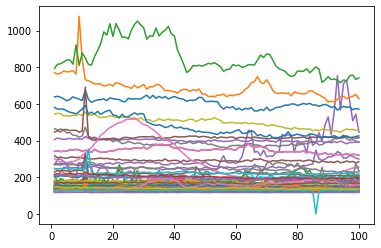

In [367]:
for df in df_list:
    if 'Mean(Control_Spot)' in df.columns:
        plt.plot(df['Frame'], df['Mean(Control_Spot)']);

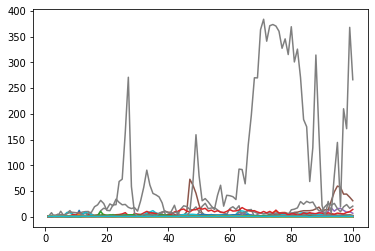

In [368]:
for df in df_list:
    if 'Mean(Control_Spot)' in df.columns:
        
        #normalise_y
        y = (df['Mean(Control_Spot)']-df['Mean(Control_Spot)'].min())/(df.loc[0,'Mean(Control_Spot)']-df['Mean(Control_Spot)'].min())
        
        plt.plot(df['Frame'], y);

In [397]:
# Need to exclude this annomaly

for n, df in enumerate(df_list):
    if 'Mean(Control_Spot)' in df.columns:
        
        #normalise_y
        y = (df['Mean(Control_Spot)']-df['Mean(Control_Spot)'].min())/(df['Mean(Control_Spot)'].max()-df['Mean(Control_Spot)'].min())
        
        if y.max() > 200:
            print('File',n,'-', file_list[n], 'has a control_spot issue')
            
        if np.isnan(y[0]):
            print('File',n,'-', file_list[n], 'gives NaN')
            
        if np.inf() in y:
            print('File',n,'-', file_list[n], 'gives inf')
        
        plt.plot(df['Frame'], y);

TypeError: 'float' object is not callable

In [ ]:
# I checked file 73 manually, and the Control Focus moves into the Control Spot ROI.

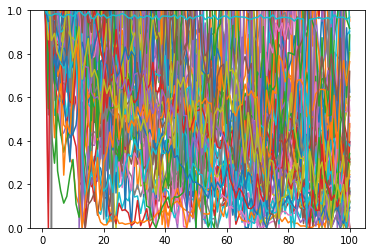

In [393]:
y_list=list()

for df in df_list:
    if 'Mean(Control_Spot)' in df.columns:
        
        #normalise_y
        y = (df['Mean(Control_Spot)']-df['Mean(Control_Spot)'].min())/(df.loc[0,'Mean(Control_Spot)']-df['Mean(Control_Spot)'].min())
        
        plt.plot(df['Frame'], y);
        plt.ylim(0,1);
        
        y_list.append(y)
        
    y_df = pd.DataFrame(y_list).T

In [394]:
y_df

,Mean(Control_Spot),Mean(Control_Spot),Mean(Control_Spot),Mean(Control_Spot),Mean(Control_Spot),Mean(Control_Spot),Mean(Control_Spot),Mean(Control_Spot),Mean(Control_Spot),Mean(Control_Spot),...,Mean(Control_Spot),Mean(Control_Spot),Mean(Control_Spot),Mean(Control_Spot),Mean(Control_Spot),Mean(Control_Spot),Mean(Control_Spot),Mean(Control_Spot),Mean(Control_Spot),Mean(Control_Spot)
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000
1,0.856488,1.308262,1.298114,0.615612,2.028058,1.666863,0.115581,3.014235,0.983139,0.936349,...,0.949444,1.215145,1.272710,1.073531,1.098160,1.259683,inf,8.191283,1.096942,0.979195
2,1.017913,0.532736,1.094617,0.607017,2.024423,0.384344,0.722380,2.469751,1.134508,0.665950,...,0.952894,1.031658,1.317739,1.008914,1.110724,1.141850,inf,0.000000,0.861612,0.975574
3,1.249740,0.811380,0.913817,0.779296,1.594280,1.898175,0.586402,0.743772,0.997338,0.516917,...,0.948392,1.094340,1.439958,0.959360,1.125551,0.801840,inf,5.276029,0.894486,0.983510
4,0.789419,0.837101,1.108726,0.509229,0.937770,1.273690,0.777337,11.003559,1.327840,0.604449,...,0.890854,1.014942,1.578592,1.075568,1.022951,1.284211,inf,3.878935,0.806999,0.984135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.491981,0.622369,0.070388,0.644873,16.640783,57.735138,1.445326,10.024911,0.355096,0.788485,...,0.091426,0.364316,0.133811,0.098017,0.071930,0.584466,inf,19.518160,0.200601,0.965656
96,0.397417,0.105222,0.234780,0.329012,12.747206,44.278988,0.606799,19.572954,0.789681,0.771567,...,0.042163,0.644042,0.480087,0.156704,0.007399,0.872253,inf,210.048426,0.128932,0.969163
97,0.397417,0.353858,0.016409,0.493401,9.170114,44.360212,1.361473,24.003559,0.784610,0.786335,...,0.019671,0.769406,0.539687,0.176169,0.120212,0.470823,inf,171.343826,0.199275,0.967722
98,0.397417,0.642245,0.129121,0.427739,10.378104,38.291348,1.713881,16.779359,0.573022,0.885316,...,0.075622,0.653793,0.235990,0.324322,0.085713,0.235156,inf,368.138015,0.029251,0.957842


In [635]:
combined_df['Protein'].unique()

array(['ALKv1', 'ALKv3', 'ALKv5', 'Ret'], dtype=object)

In [630]:
#Plot groups of data

In [638]:
combined_df[combined_df['Protein']=='ALKv1'].index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 27, 28, 29,
            30, 31, 32, 33, 34, 35, 36, 37, 38, 47, 53, 54, 55, 56, 57, 58, 59,
            60, 61, 62, 63, 64],
           dtype='int64')

In [639]:
df_list[combined_df[combined_df['Protein']=='ALKv1'].index]

TypeError: list indices must be integers or slices, not Int64Index

In [654]:
combined_df['Protein']=='ALKv1' and combined_df['Fixed']==False

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

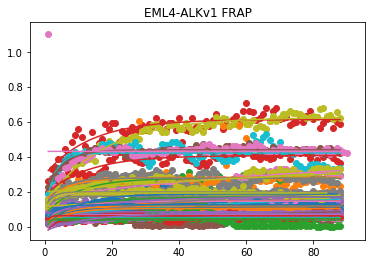

In [713]:
for df_index in combined_df[combined_df['Protein']=='ALKv1'].index:
#     print(df_index)
    
    df    = df_list[df_index]
    title = file_list[df_index]
    t0    = t0_frames[df_index]

    sub = subtract_background(df)
    norm = normalise(sub)
    FRAP = get_FRAP(norm, ROI, t0)
    
    x  = FRAP['Time']
    y0 = FRAP['Mean(Focus)']
    A  = 0.7
    c  = 0.6
    h  = 0.24

    p0 = [A, c, h]
    bounds = (0.1, 0.1, 0), (1, 90, 1)
    
    fit, p, e = fit_exp(x, y0, p0, bounds)
    
    plt.scatter(FRAP['Time'], y0)
    plt.plot(FRAP['Time'], fit)
    plt.title('EML4-ALKv1 FRAP');

In [665]:
combined_df

,File,Fixed,Protein,Bleach Frame,Filename,Experiment,Initial_Focus,Initial_Spot,Initial_Control_Focus,Initial_Control_Spot,...,Final_Background,Percent_Intensity_After_Bleaching_Focus,Focus_to_Spot_Ratio,Raw Absolute Recovery,Raw_Absolute_Recovery,Raw_Absolute_Recovery_Focus,Raw_Absolute_Recovery_Spot,Absolute Recovery,Percentage_Recovery_Focus,Percentage_Recovery_Spot
0,0,False,ALKv1,12,EML4-ALKv1_FRAP_10_Results.csv,Exp002,267.144429,127.203571,400.106000,124.434571,...,113.7314,3.557728,11.344643,12.9863,12.9863,12.9863,5.1805,149.649429,8.759291,53.360065
1,1,False,ALKv1,12,EML4-ALKv1_FRAP_11_Results.csv,Exp002,189.503714,122.808286,205.458000,120.193286,...,114.2656,4.147757,8.756829,8.1346,8.1346,8.1346,4.5465,72.998714,11.222814,72.129048
2,2,False,ALKv1,12,EML4-ALKv1_FRAP_12_Results.csv,Exp002,241.954571,142.179286,209.415143,140.734000,...,113.1130,7.629960,4.460077,27.8869,27.8869,27.8869,16.3009,121.582571,23.386502,74.749789
3,3,False,ALKv1,12,EML4-ALKv1_FRAP_13_Results.csv,Exp002,164.263714,155.141429,239.760000,177.461286,...,114.6555,25.823277,1.224300,17.4568,17.4568,17.4568,13.1899,38.891714,47.186006,44.306863
4,4,False,ALKv1,12,EML4-ALKv1_FRAP_14_Results.csv,Exp002,1389.321286,216.406714,2070.260714,274.183714,...,115.4462,2.651342,12.582021,97.4456,97.4456,97.4456,29.6297,1254.142286,7.857982,36.477328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,81,False,Ret,12,Ret_FRAP_01_Results.csv,Exp004,162.902714,150.084571,NaN,NaN,...,114.9029,47.405082,1.363369,1.7499,1.7499,1.7499,4.5540,28.254714,6.785263,29.501370
82,82,False,Ret,12,Ret_FRAP_02_Results.csv,Exp004,1088.525714,620.997143,NaN,NaN,...,119.0059,35.752980,1.929428,113.3169,113.3169,113.3169,78.0071,671.249714,18.154676,38.291116
83,83,False,Ret,12,Ret_FRAP_03_Results.csv,Exp004,139.413857,131.158000,NaN,NaN,...,114.2459,42.667762,1.502408,1.1973,1.1973,1.1973,3.2053,13.831857,8.469950,57.483859
84,84,False,Ret,12,Ret_FRAP_04_Results.csv,Exp004,178.115000,162.712000,NaN,NaN,...,114.1003,71.149939,1.317956,-5.3834,-5.3834,-5.3834,5.6677,30.294000,-29.137259,38.061245


In [666]:
combined_df['Corrections'] = 'No notes'

In [672]:
combined_df['Filename']=='EML4-ALKv1_FRAP_2_Results.csv'

0     False
1     False
2     False
3     False
4     False
      ...  
81    False
82    False
83    False
84    False
85    False
Name: Filename, Length: 86, dtype: bool

In [681]:
combined_df[combined_df['Filename']=='EML4-ALKv1_FRAP_2_Results.csv']

,File,Fixed,Protein,Bleach Frame,Filename,Experiment,Initial_Focus,Initial_Spot,Initial_Control_Focus,Initial_Control_Spot,...,Percent_Intensity_After_Bleaching_Focus,Focus_to_Spot_Ratio,Raw Absolute Recovery,Raw_Absolute_Recovery,Raw_Absolute_Recovery_Focus,Raw_Absolute_Recovery_Spot,Absolute Recovery,Percentage_Recovery_Focus,Percentage_Recovery_Spot,Corrections
7,7,False,ALKv1,12,EML4-ALKv1_FRAP_2_Results.csv,Exp002,414.487429,163.597714,542.163429,143.269571,...,11.842819,5.996552,6.6446,6.6446,6.6446,24.5145,285.375429,2.503179,71.085957,No notes
31,31,False,ALKv1,12,EML4-ALKv1_FRAP_2_Results.csv,Exp003,299.874714,187.427143,324.493429,204.363000,...,11.879848,3.022376,80.5279,80.5279,80.5279,23.2280,152.823714,54.754545,57.529022,No notes


In [683]:
combined_df[combined_df['Experiment']=='Exp003']

,File,Fixed,Protein,Bleach Frame,Filename,Experiment,Initial_Focus,Initial_Spot,Initial_Control_Focus,Initial_Control_Spot,...,Percent_Intensity_After_Bleaching_Focus,Focus_to_Spot_Ratio,Raw Absolute Recovery,Raw_Absolute_Recovery,Raw_Absolute_Recovery_Focus,Raw_Absolute_Recovery_Spot,Absolute Recovery,Percentage_Recovery_Focus,Percentage_Recovery_Spot,Corrections
27,27,True,ALKv1,12,EML4-ALKv1_fixed_FRAP_1_Results.csv,Exp003,838.129714,158.889857,531.107429,147.275571,...,2.101478,318.762414,26.7808,26.7808,26.7808,5.7937,718.660714,3.859557,14.697042,No notes
28,28,True,ALKv1,12,EML4-ALKv1_fixed_FRAP_2_Results.csv,Exp003,998.899571,137.789286,327.200286,139.429143,...,8.319235,37.176761,56.2377,56.2377,56.2377,1.3636,881.629571,6.935925,6.645455,No notes
29,29,True,ALKv1,12,EML4-ALKv1_fixed_FRAP_3_Results.csv,Exp003,998.899571,137.789286,327.200286,139.429143,...,8.319235,37.176761,56.2377,56.2377,56.2377,1.3636,881.629571,6.935925,6.645455,No notes
30,30,False,ALKv1,12,EML4-ALKv1_FRAP_10_Results.csv,Exp003,341.877714,156.282000,443.415143,151.583857,...,5.124913,5.439740,30.5333,30.5333,30.5333,11.1501,213.923714,14.140388,39.360703,No notes
31,31,False,ALKv1,12,EML4-ALKv1_FRAP_2_Results.csv,Exp003,299.874714,187.427143,324.493429,204.363000,...,11.879848,3.022376,80.5279,80.5279,80.5279,23.2280,152.823714,54.754545,57.529022,No notes
32,32,False,ALKv1,12,EML4-ALKv1_FRAP_3_Results.csv,Exp003,372.798286,136.448143,324.203286,223.379857,...,2.599122,11.483484,7.5866,7.5866,7.5866,8.3742,255.135286,3.009764,44.578847,No notes
33,33,False,ALKv1,13,EML4-ALKv1_FRAP_4_Results.csv,Exp003,793.731857,699.398714,170.309429,122.137857,...,4.010602,1.161366,64.5167,64.5167,64.5167,31.1207,655.098857,9.900987,5.549680,No notes
34,34,False,ALKv1,12,EML4-ALKv1_FRAP_5_Results.csv,Exp003,187.039857,141.118714,222.215000,137.943143,...,19.111334,2.710130,3.8335,3.8335,3.8335,4.0025,59.289857,6.546852,29.939304,No notes
35,35,False,ALKv1,12,EML4-ALKv1_FRAP_6_Results.csv,Exp003,527.796714,163.432143,417.427143,227.443857,...,2.631348,8.311587,3.9497,3.9497,3.9497,5.4239,404.128714,0.981171,13.640178,No notes
36,36,False,ALKv1,12,EML4-ALKv1_FRAP_7_Results.csv,Exp003,255.123571,181.586714,226.396143,164.027000,...,19.564553,2.103915,28.8785,28.8785,28.8785,22.2141,112.786571,25.553804,56.596845,No notes


In [684]:
combined_df[(combined_df['Experiment']=='Exp003') & (combined_df['Filename']=='EML4-ALKv1_FRAP_2_Results.csv')]['Corrections']

31    No notes
Name: Corrections, dtype: object

In [686]:
combined_df.loc[(combined_df['Experiment']=='Exp003') 
                & (combined_df['Filename']=='EML4-ALKv1_FRAP_2_Results.csv'), 'Corrections'] = 'Really ALKv3'

In [688]:
combined_df.loc[(combined_df['Experiment']=='Exp003') 
                & (combined_df['Filename']=='EML4-ALKv3_FRAP_06_Results.csv'), 'Corrections'] = 'Same Cell as EML4-ALKv3_FRAP_01_Results.csv'

combined_df.loc[(combined_df['Experiment']=='Exp003') 
                & (combined_df['Filename']=='EML4-ALKv3_FRAP_01_Results.csv'), 'Corrections'] = 'Same Cell as EML4-ALKv3_FRAP_06_Results.csv'

In [ ]:
combined_df.loc[(combined_df['Experiment']=='Exp003') 
                & (combined_df['Filename']=='EML4-ALKv1_FRAP_2_Results.csv'), 'Corrections'] = 'Really ALKv3'

In [689]:
combined_df[combined_df['Experiment']=='Exp004']

,File,Fixed,Protein,Bleach Frame,Filename,Experiment,Initial_Focus,Initial_Spot,Initial_Control_Focus,Initial_Control_Spot,...,Percent_Intensity_After_Bleaching_Focus,Focus_to_Spot_Ratio,Raw Absolute Recovery,Raw_Absolute_Recovery,Raw_Absolute_Recovery_Focus,Raw_Absolute_Recovery_Spot,Absolute Recovery,Percentage_Recovery_Focus,Percentage_Recovery_Spot,Corrections
53,53,True,ALKv1,12,EML4-ALKv1_fixed_FRAP_02_Results.csv,Exp004,210.746714,139.029857,339.936571,150.492714,...,16.011875,3.787332,3.4194,3.4194,3.4194,2.3156,90.787714,4.172406,12.142087,No notes
54,54,True,ALKv1,16,EML4-ALKv1_fixed_FRAP_03_Results.csv,Exp004,425.579000,169.766714,546.170714,179.760857,...,13.909921,5.595120,9.9578,9.9578,9.9578,8.4174,300.798000,3.707159,18.711273,No notes
55,55,False,ALKv1,12,EML4-ALKv1_FRAP_01_Results.csv,Exp004,629.957286,800.738429,621.799714,208.521143,...,18.847551,0.750897,77.8487,77.8487,77.8487,88.8479,436.156286,18.613124,14.638725,No notes
56,56,False,ALKv1,12,EML4-ALKv1_FRAP_02_Results.csv,Exp004,600.921857,153.011714,267.434286,155.809143,...,6.281797,12.568482,24.6603,24.6603,24.6603,12.2096,474.028857,5.412686,46.746558,No notes
57,57,False,ALKv1,12,EML4-ALKv1_FRAP_03_Results.csv,Exp004,840.368286,165.884857,362.683429,142.333143,...,3.473015,14.400270,34.2311,34.2311,34.2311,29.7394,715.036286,4.896955,73.334907,No notes
58,58,False,ALKv1,12,EML4-ALKv1_FRAP_04_Results.csv,Exp004,492.446143,127.773286,1211.290143,168.843286,...,2.013941,28.956522,-6.4976,-6.4976,-6.4976,3.4317,377.824143,-1.753553,26.094027,No notes
59,59,False,ALKv1,12,EML4-ALKv1_FRAP_05_Results.csv,Exp004,251.674714,143.247000,997.880714,120.009286,...,4.200977,4.644087,4.8420,4.8420,4.8420,0.4841,136.041714,3.676099,1.753096,No notes
60,60,False,ALKv1,12,EML4-ALKv1_FRAP_06_Results.csv,Exp004,507.796714,121.075143,160.540429,117.253000,...,2.100912,61.940794,22.8799,22.8799,22.8799,2.6316,392.786714,5.942635,43.388920,No notes
61,61,False,ALKv1,12,EML4-ALKv1_FRAP_07_Results.csv,Exp004,556.337286,338.926429,688.313714,343.774714,...,22.409567,1.975916,91.2014,91.2014,91.2014,79.5346,353.245286,26.675322,58.552608,No notes
62,62,False,ALKv1,10,EML4-ALKv1_FRAP_08_Results.csv,Exp004,556.337286,338.926429,688.313714,343.774714,...,109.996433,1.975916,-295.3036,-295.3036,-295.3036,-239.6184,34.092286,661.956673,130.711470,No notes


In [820]:
FRAP_list = list()

for df_index in combined_df[(combined_df['Protein']=='ALKv1') &
                           (combined_df['Fixed']==False)].index:
#     print(df_index)
    
    df    = df_list[df_index]
    title = file_list[df_index]
    t0    = t0_frames[df_index]

    sub = subtract_background(df)
    norm = normalise(sub)
    FRAP = get_FRAP(norm, ROI, t0)
    
    #Set time as index to allow alignment
    FRAP.set_index(FRAP.Time, inplace=True)
    FRAP_curve = FRAP[ROI]
    
    #Propagate the experiment title
    FRAP_curve.name = title
    FRAP_list.append(FRAP_curve)
    
FRAP_df = pd.concat(FRAP_list, axis=1) 

In [822]:
FRAP_df

,EML4-ALKv1_FRAP_10_Results.csv,EML4-ALKv1_FRAP_11_Results.csv,EML4-ALKv1_FRAP_12_Results.csv,EML4-ALKv1_FRAP_13_Results.csv,EML4-ALKv1_FRAP_14_Results.csv,EML4-ALKv1_FRAP_16_Results.csv,EML4-ALKv1_FRAP_1_Results.csv,EML4-ALKv1_FRAP_2_Results.csv,EML4-ALKv1_FRAP_3_Results.csv,EML4-ALKv1_FRAP_4_Results.csv,...,EML4-ALKv1_FRAP_01_Results.csv,EML4-ALKv1_FRAP_02_Results.csv,EML4-ALKv1_FRAP_03_Results.csv,EML4-ALKv1_FRAP_04_Results.csv,EML4-ALKv1_FRAP_05_Results.csv,EML4-ALKv1_FRAP_06_Results.csv,EML4-ALKv1_FRAP_07_Results.csv,EML4-ALKv1_FRAP_08_Results.csv,EML4-ALKv1_FRAP_09_Results.csv,EML4-ALKv1_FRAP_10_Results.csv
Time,,,,,,,,,,,,,,,,,,,,,
1,0.035577,0.041478,0.076300,0.258233,0.026513,0.024931,0.143917,0.118428,0.096939,0.054661,...,0.188476,0.062818,0.034730,0.020139,0.042010,0.021009,0.224096,1.099964,0.149212,0.158106
2,0.037082,0.078014,0.101126,0.327460,0.038737,0.027988,0.150631,0.130713,0.109359,0.065396,...,0.258450,0.077868,0.047765,0.028836,0.053495,0.018071,0.275449,0.136035,0.166483,0.180885
3,0.043520,0.092451,0.132686,0.342041,0.042364,0.029824,0.166835,0.141278,0.109130,0.074006,...,0.294733,0.093519,0.056529,0.028913,0.066275,0.024365,0.294763,0.224096,0.206615,0.189738
4,0.041253,0.079396,0.145360,0.385281,0.047322,0.032381,0.175228,0.153914,0.119472,0.075681,...,0.318888,0.096295,0.054345,0.038230,0.039180,0.027731,0.333742,0.275449,0.223769,0.215026
5,0.054487,0.097578,0.163601,0.385582,0.054047,0.033087,0.179415,0.167740,0.113277,0.080517,...,0.337919,0.095919,0.066174,0.043101,0.063243,0.027835,0.343400,0.294763,0.226455,0.192242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,0.112453,0.134540,0.320469,0.565630,0.107739,0.089123,0.298739,0.127854,0.199937,0.155744,...,0.329174,0.106453,0.073667,-0.002184,0.057504,0.079170,0.440033,0.428163,0.253329,0.322993
87,0.103559,0.139148,0.297322,0.596779,0.104599,0.090711,0.294144,0.129909,0.175462,0.165214,...,0.318515,0.105019,0.079264,0.003299,0.093456,0.075453,0.428534,0.451167,0.247772,0.331625
88,0.120826,0.148923,0.292571,0.584468,0.101396,0.086217,0.287263,0.154602,0.189124,0.158646,...,0.335209,0.099846,0.077951,0.001972,0.054529,0.082009,0.422493,0.440033,NaN,0.326377


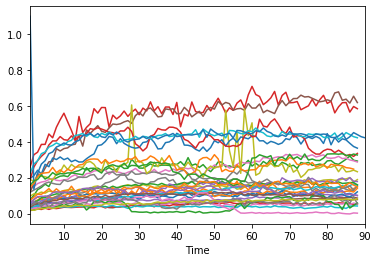

In [821]:
FRAP_df.plot(legend=None);

In [867]:
def get_FRAP_df(combined_df, protein, fix=False):

    FRAP_list = list()

    for df_index in combined_df[(combined_df['Protein']==protein) &
                               (combined_df['Fixed']==fix)].index:
    #     print(df_index)

        df    = df_list[df_index]
        title = file_list[df_index]
        t0    = t0_frames[df_index]

        sub = subtract_background(df)
        norm = normalise(sub)
        FRAP = get_FRAP(norm, ROI, t0)

        #Set time as index to allow alignment
        FRAP.set_index(FRAP.Time, inplace=True)
        FRAP_curve = FRAP[ROI]

        #Propagate the experiment title
        FRAP_curve.name = df_index
        FRAP_list.append(FRAP_curve)

    FRAP_df = pd.concat(FRAP_list, axis=1)
    
    FRAP_df.plot(legend=None);
    plt.title(protein)

    return FRAP_df


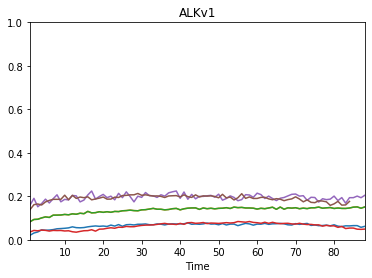

In [868]:
fixed_ALKv1_FRAP_df = get_FRAP_df(combined_df, protein='ALKv1', fix=True)
plt.ylim(0,1);

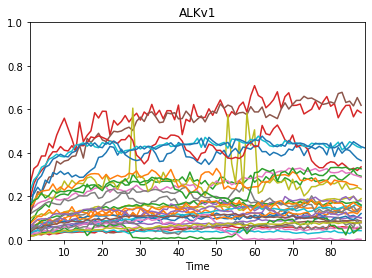

In [869]:
ALKv1_FRAP_df = get_FRAP_df(combined_df, protein='ALKv1')
plt.ylim(0,1);

In [846]:
file_list.index('EML4-ALKv1_FRAP_08_Results.csv')

62

In [ ]:
t0_frames

In [855]:
combined_df.iloc[62,:]

File                                                 62
Fixed                                             False
Protein                                           ALKv1
Bleach Frame                                         11
Filename                 EML4-ALKv1_FRAP_08_Results.csv
Experiment                                       Exp004
Initial_Focus                                   556.337
Initial_Spot                                    338.926
Initial_Control_Focus                           688.314
Initial_Control_Spot                            343.775
Initial_Background                               116.15
t0_Focus                                            176
t0_Spot                                          174.48
t0_Control_Focus                                677.732
t0_Control_Spot                                 342.918
t0_Background                                   116.119
Final_Focus                                     305.644
Final_Spot                                      

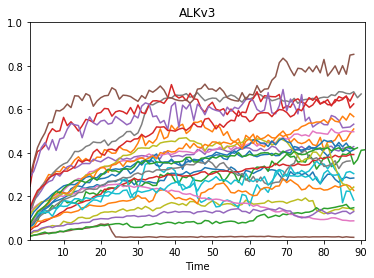

In [870]:
ALKv3_FRAP_df = get_FRAP_df(combined_df, protein='ALKv3')
plt.ylim(0,1);

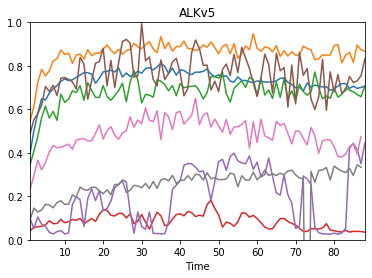

In [829]:
ALKv5_FRAP_df = get_FRAP_df(combined_df, protein='ALKv5')
plt.ylim(0,1);

In [858]:
ALKv5_FRAP_df

,EML4-ALKv5_FRAP_1_Results.csv,EML4-ALKv5_FRAP_01_Results.csv,EML4-ALKv5_FRAP_02_Results.csv,EML4-ALKv5_FRAP_03_Results.csv,EML4-ALKv5_FRAP_04_Results.csv,EML4-ALKv5_FRAP_05_Results.csv,EML4-ALKv5_FRAP_06_Results.csv,EML4-ALKv5_FRAP_07_Results.csv
Time,,,,,,,,
1,0.399256,0.545121,0.344776,0.041621,0.097839,0.487470,0.232683,0.093638
2,0.501512,0.613763,0.408977,0.057626,0.051919,0.552713,0.296142,0.145837
3,0.581653,0.723371,0.474408,0.059524,0.104930,0.579368,0.366205,0.128102
4,0.649034,0.784194,0.561912,0.062420,0.071989,0.619707,0.321675,0.136685
5,0.642456,0.753168,0.615089,0.068482,0.062431,0.704976,0.355544,0.163299
...,...,...,...,...,...,...,...,...
84,0.696301,0.862414,0.688395,0.035408,0.421177,0.750854,0.428476,0.328383
85,0.706569,0.815850,0.680767,0.038987,0.443796,0.723820,0.442244,0.296032
86,0.696436,0.895830,0.668340,0.038681,0.415471,0.730495,0.394573,0.344881


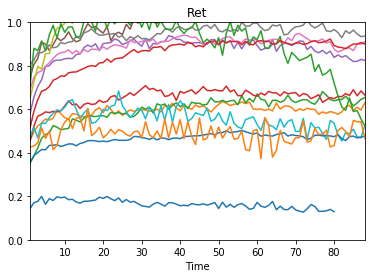

In [861]:
Ret_FRAP_df = get_FRAP_df(combined_df, protein='Ret')
plt.ylim(0,1);

In [ ]:
#Use a sequential colourmap

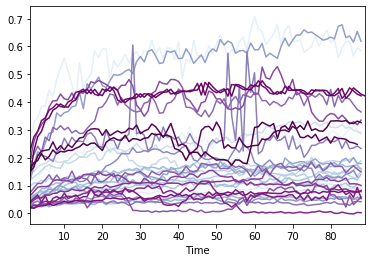

In [864]:
ALKv1_FRAP_df.plot(legend=None, cmap="BuPu");

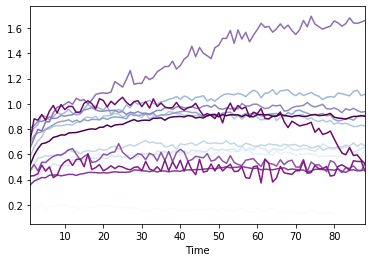

In [863]:
Ret_FRAP_df.plot(legend=None, cmap="BuPu");

In [ ]:
## Colour by trait

In [881]:
combined_df[combined_df['File']==2]['Initial_Focus']

2    241.954571
Name: Initial_Focus, dtype: float64

In [882]:
combined_df.loc[combined_df['File']==2,'Initial_Focus']

2    241.954571
Name: Initial_Focus, dtype: float64

In [888]:
combined_df.loc[combined_df['File']==2,'Initial_Focus'].values[0]

241.95457142857143

In [914]:
#get trait by filename
#Let's start with initial focus intensity

def get_trait_list(combined_df, FRAP_df, trait_name):

    trait_list=list()

    for df_index in FRAP_df.columns:

        trait=combined_df[combined_df['File']==df_index][trait_name].values[0]

        trait_list.append(trait)

    return trait_list

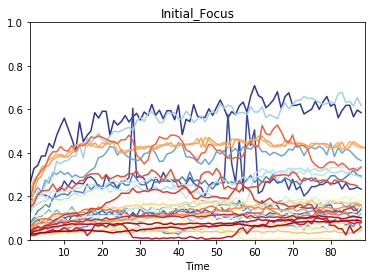

In [961]:
trait_name = 'Initial_Focus'

trait_list = get_trait_list(combined_df, ALKv1_FRAP_df, trait_name)

trait_array = np.array(trait_list)

trait_array.argsort()

ALKv1_FRAP_df.iloc[:,trait_array.argsort()].plot(legend=None, c=trait_list, cmap="RdYlBu_r");
plt.title(trait_name);
plt.ylim(0,1);
#Bright foci tend to recover less well

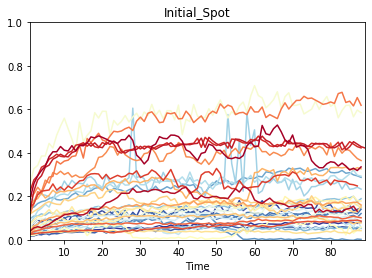

In [962]:
trait_name = 'Initial_Spot'

trait_list = get_trait_list(combined_df, ALKv1_FRAP_df, trait_name)

trait_array = np.array(trait_list)

trait_array.argsort()

ALKv1_FRAP_df.iloc[:,trait_array.argsort()].plot(legend=None, c=trait_list, cmap="RdYlBu_r");
plt.title(trait_name);
plt.ylim(0,1);
#Higher expression tends to recover better

In [959]:
combined_df.columns

Index(['File', 'Fixed', 'Protein', 'Bleach Frame', 'Filename', 'Experiment',
       'Initial_Focus', 'Initial_Spot', 'Initial_Control_Focus',
       'Initial_Control_Spot', 'Initial_Background', 't0_Focus', 't0_Spot',
       't0_Control_Focus', 't0_Control_Spot', 't0_Background', 'Final_Focus',
       'Final_Spot', 'Final_Control_Focus', 'Final_Control_Spot',
       'Final_Background'],
      dtype='object')

In [960]:
#Focus Relative to Cytoplasm a.k.a. Focus/Spot
combined_df['Initial_Target_Ratio']  = combined_df['Initial_Focus'] / combined_df['Initial_Spot']
combined_df['Initial_Control_Ratio'] = combined_df['Initial_Control_Focus'] / combined_df['Initial_Control_Spot']

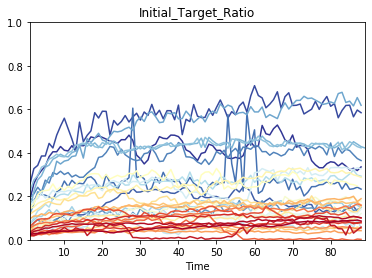

In [966]:
trait_name = 'Initial_Target_Ratio'

trait_list = get_trait_list(combined_df, ALKv1_FRAP_df, trait_name)

trait_array = np.array(trait_list)

ALKv1_FRAP_df.iloc[:,trait_array.argsort()].plot(legend=None, c=trait_list, cmap="RdYlBu_r");
plt.title(trait_name);
plt.ylim(0,1);
#Experiments where the focus is bright relative to the surrounding cytoplasm, tend to recover less fully

#This is consistent with a lower supply of free protein, and a lower surface area to volume ratio of the puncta. 

In [967]:
#These are the Initial_Target_Ratios for ALKv1
trait_array

array([ 2.10013308,  1.54308574,  1.70175684,  1.0587998 ,  6.41995462,
       17.212456  ,  2.42135804,  2.53357714,  3.171978  ,  3.71725301,
        2.43753521,  1.89759348,  2.91986016,  3.61398546,  2.18756936,
        1.59995351,  2.73216094,  1.13487749,  1.32540789,  3.22945478,
        1.40496827,  1.64304038,  5.40419263,  0.78672044,  3.92729315,
        5.06597347,  3.85406183,  1.75692834,  4.19406248,  1.64146918,
        1.64146918,  2.32259992,  1.87714745])

In [969]:
len(trait_array)

33

In [968]:
trait_array.mean()

3.0448084013927272

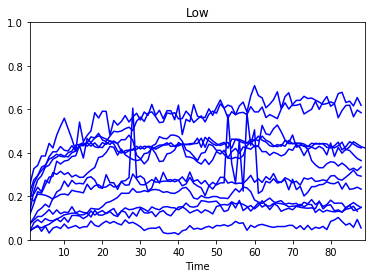

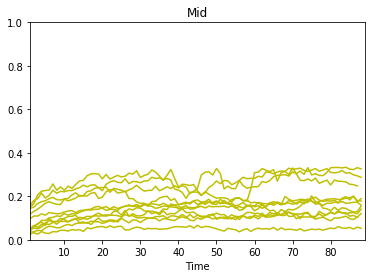

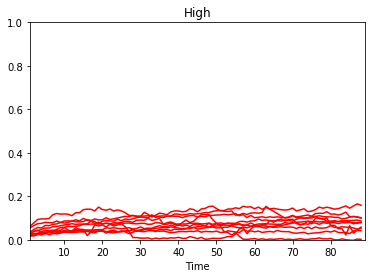

In [1020]:
#What to the low, mid and high fractions look like?
trait_name = 'Initial_Target_Ratio'

trait_list = get_trait_list(combined_df, ALKv1_FRAP_df, trait_name)

trait_array = np.array(trait_list)

ALKv1_FRAP_df.iloc[:,trait_array.argsort()[:12]].plot(legend=None, c='b');
plt.title('Low');
plt.ylim(0,1);
plt.show()

ALKv1_FRAP_df.iloc[:,trait_array.argsort()[12:23]].plot(legend=None, c='y');
plt.title('Mid');
plt.ylim(0,1);
plt.show()

ALKv1_FRAP_df.iloc[:,trait_array.argsort()[23:]].plot(legend=None, c='r');
plt.title('High');
plt.ylim(0,1);
plt.show()

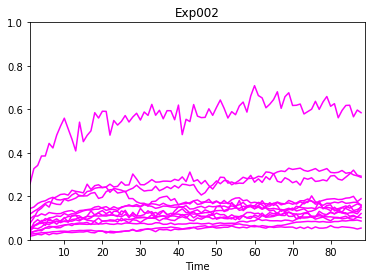

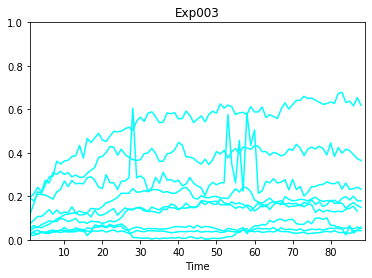

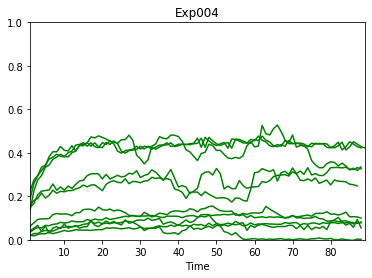

In [987]:
#Check it is not related to experiment
group1 = list(combined_df[(combined_df.Experiment=='Exp002') & (combined_df.Fixed==False)].index)
group2 = list(combined_df[(combined_df.Experiment=='Exp003') & (combined_df.Fixed==False)].index)
group3 = list(combined_df[(combined_df.Experiment=='Exp004') & (combined_df.Fixed==False)].index)

ALKv1_FRAP_df.loc[:,group1].plot(legend=None, c='magenta');
plt.title('Exp002');
plt.ylim(0,1);
plt.show()

ALKv1_FRAP_df.loc[:,group2].plot(legend=None, c='cyan');
plt.title('Exp003');
plt.ylim(0,1);
plt.show()

ALKv1_FRAP_df.loc[:,group3].plot(legend=None, c='green');
plt.title('Exp004');
plt.ylim(0,1);
plt.show()

In [ ]:
## What about absolute recovery?

In [1008]:
df_index=7

df    = df_list[df_index]
title = file_list[df_index]
t0    = t0_frames[df_index]

sub = subtract_background(df)

#slice after t0 and subtract t0
real = sub[t0:].copy()

#add time in seconds
real['Time'] = (real['Frame']-t0)

#index by time
real.set_index(real.Time, inplace=True)

real = real.subtract(real.iloc[0,:])
real.drop(columns=['Frame', 'Time'], inplace=True)
    
real

,Mean(Focus),Mean(Spot),Mean(Control_Focus),Mean(Control_Spot)
Time,,,,
1,0.000,0.000,0.000,0.000
2,3.699,1.812,-14.394,-1.168
3,6.880,3.845,-15.440,-1.920
4,10.685,6.946,-9.459,-2.003
5,14.848,6.641,-2.637,-2.593
...,...,...,...,...
84,7.731,25.445,-4.496,-0.412
85,4.982,23.799,-10.771,2.656
86,2.838,21.703,-26.523,2.922


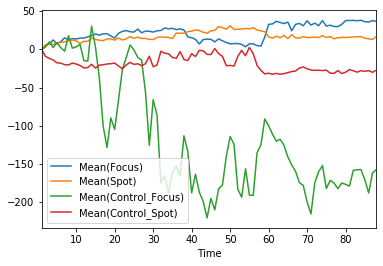

In [1018]:
real.plot();

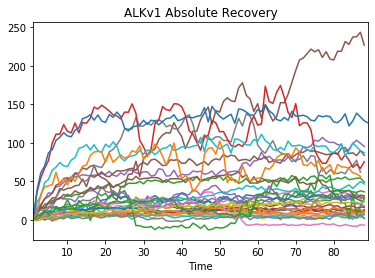

In [1013]:
protein = 'ALKv1'
fix = False

real_list = list()

for df_index in combined_df[(combined_df['Protein']==protein) &
                           (combined_df['Fixed']==fix)].index:
#     print(df_index)

    df    = df_list[df_index]
    title = file_list[df_index]
    t0    = t0_frames[df_index]

    sub = subtract_background(df)
  
    #slice after t0 and subtract t0
    real = sub[t0:].copy()

    #add time in seconds
    real['Time'] = (real['Frame']-t0)

    #index by time
    real.set_index(real.Time, inplace=True)

    real = real.subtract(real.iloc[0,:])
    real.drop(columns=['Frame', 'Time'], inplace=True)

    real_curve = real[ROI]

    #Propagate the experiment index
    real_curve.name = df_index
    real_list.append(real_curve)

real_df = pd.concat(real_list, axis=1)

real_df.plot(legend=None);
plt.title(protein + ' Absolute Recovery');

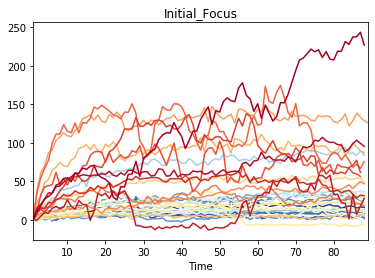

In [1016]:
trait_name = 'Initial_Focus'

trait_list = get_trait_list(combined_df, real_df, trait_name)

trait_array = np.array(trait_list)

real_df.iloc[:,trait_array.argsort()].plot(legend=None, c=trait_list, cmap="RdYlBu_r");
plt.title(trait_name);
#Brighter the initial puncta tend to have a greater absolute recovery

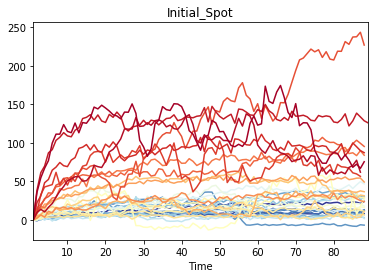

In [1017]:
trait_name = 'Initial_Spot'

trait_list = get_trait_list(combined_df, real_df, trait_name)

trait_array = np.array(trait_list)

real_df.iloc[:,trait_array.argsort()].plot(legend=None, c=trait_list, cmap="RdYlBu_r");
plt.title(trait_name);
#Brighter the initial cytoplasm tends to give a greater absolute recovery

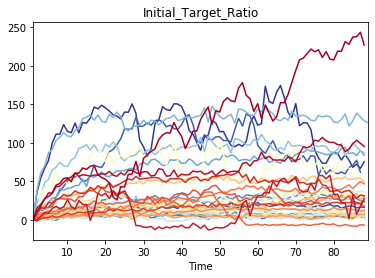

In [1015]:
trait_name = 'Initial_Target_Ratio'

trait_list = get_trait_list(combined_df, real_df, trait_name)

trait_array = np.array(trait_list)

real_df.iloc[:,trait_array.argsort()].plot(legend=None, c=trait_list, cmap="RdYlBu_r");
plt.title(trait_name);
# Absolute recovery is less dependent upon Initial_Target_Ratio 
# foci closer to their surrounding in intensity (e.g. small foci) still tend to recover faster.

In [1019]:
#Let's look at the limiting cases?

In [1023]:
trait_array.argsort()

array([23,  3, 17, 18, 20,  1, 15, 30, 29, 21,  2, 27, 32, 11,  0, 14, 31,
        6, 10,  7, 16, 12,  8, 19, 13,  9, 26, 24, 28, 25, 22,  4,  5],
      dtype=int64)

In [1028]:
combined_df[(combined_df.Protein=='ALKv1') & (combined_df.Fixed==False)].sort_values('Initial_Target_Ratio')

,File,Fixed,Protein,Bleach Frame,Filename,Experiment,Initial_Focus,Initial_Spot,Initial_Control_Focus,Initial_Control_Spot,...,t0_Control_Focus,t0_Control_Spot,t0_Background,Final_Focus,Final_Spot,Final_Control_Focus,Final_Control_Spot,Final_Background,Initial_Target_Ratio,Initial_Control_Ratio
55,55,False,ALKv1,12,EML4-ALKv1_FRAP_01_Results.csv,Exp004,629.957286,800.738429,621.799714,208.521143,...,588.546,211.291,114.683,289.5597,282.6489,547.5082,199.7653,114.5125,0.786720,2.981950
3,3,False,ALKv1,12,EML4-ALKv1_FRAP_13_Results.csv,Exp002,164.263714,155.141429,239.760000,177.461286,...,254.258,173.531,114.410,144.7248,138.5619,249.9372,169.7101,114.6555,1.058800,1.351055
33,33,False,ALKv1,13,EML4-ALKv1_FRAP_4_Results.csv,Exp003,793.731857,699.398714,170.309429,122.137857,...,188.732,125.189,114.884,206.6297,169.7537,194.0608,126.5997,114.7489,1.134877,1.394403
34,34,False,ALKv1,12,EML4-ALKv1_FRAP_5_Results.csv,Exp003,187.039857,141.118714,222.215000,137.943143,...,213.000,142.179,114.577,132.3185,131.7525,209.8153,131.0489,114.2249,1.325408,1.610917
36,36,False,ALKv1,12,EML4-ALKv1_FRAP_7_Results.csv,Exp003,255.123571,181.586714,226.396143,164.027000,...,218.907,164.082,114.693,170.9915,164.5511,193.5288,154.6275,114.9542,1.404968,1.380237
1,1,False,ALKv1,12,EML4-ALKv1_FRAP_11_Results.csv,Exp002,189.503714,122.808286,205.458000,120.193286,...,209.340,119.582,113.898,125.1556,121.0515,200.3225,119.1204,114.2656,1.543086,1.709397
31,31,False,ALKv1,12,EML4-ALKv1_FRAP_2_Results.csv,Exp003,299.874714,187.427143,324.493429,204.363000,...,312.278,201.923,132.840,233.3319,170.2790,440.3206,183.5629,125.8453,1.599954,1.587829
62,62,False,ALKv1,11,EML4-ALKv1_FRAP_08_Results.csv,Exp004,556.337286,338.926429,688.313714,343.774714,...,677.732,342.918,116.119,305.6444,282.6266,532.1155,323.8867,115.7744,1.641469,2.002223
61,61,False,ALKv1,12,EML4-ALKv1_FRAP_07_Results.csv,Exp004,556.337286,338.926429,688.313714,343.774714,...,662.763,335.633,115.799,305.6444,282.6266,532.1155,323.8867,115.7744,1.641469,2.002223
37,37,False,ALKv1,12,EML4-ALKv1_FRAP_8_Results.csv,Exp003,263.508000,160.378286,226.658286,151.219857,...,226.979,149.189,115.420,139.5753,142.2735,249.6650,144.0066,115.3207,1.643040,1.498866


In [ ]:
#The limiting cases are good enought to support this conclusion.

In [ ]:
#Plot t1/2 against different traits

In [1030]:
ALKv1_FRAP_df[0]

Time
1     0.035577
2     0.037082
3     0.043520
4     0.041253
5     0.054487
        ...   
85    0.108302
86    0.112453
87    0.103559
88    0.120826
89         NaN
Name: 0, Length: 89, dtype: float64

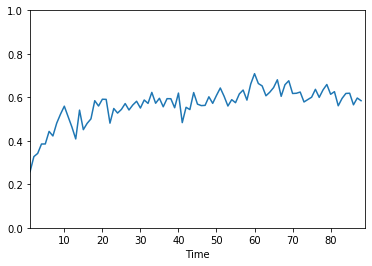

In [1071]:
#get frap
example_frap = ALKv1_FRAP_df[3]

example_frap.plot();
plt.ylim(0,1);

In [1077]:
type(FRAP)

pandas.core.frame.DataFrame

In [ ]:
x = FRAP['Time']
y0 = FRAP[ROI]

In [1078]:
FRAP

,Mean(Focus),Mean(Spot),Mean(Control_Focus),Mean(Control_Spot),Frame,Time
12,0.143917,0.219532,0.985455,1.011923,13,1
13,0.150631,0.298381,0.978785,1.111614,14,2
14,0.166835,0.371242,0.982053,0.992771,15,3
15,0.175228,0.270458,0.967724,0.846108,16,4
16,0.179415,0.296009,0.923708,1.035611,17,5
...,...,...,...,...,...,...
95,0.306202,0.572810,0.837244,1.116351,96,84
96,0.308906,0.463845,0.827710,0.995392,97,85
97,0.298739,0.546191,0.794257,1.055670,98,86
98,0.294144,0.480089,0.835163,1.148002,99,87


In [1079]:
ALKv1_FRAP_df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
Time,,,,,,,,,,,,,,,,,,,,,
1,0.035577,0.041478,0.076300,0.258233,0.026513,0.024931,0.143917,0.118428,0.096939,0.054661,...,0.188476,0.062818,0.034730,0.020139,0.042010,0.021009,0.224096,0.136035,0.149212,0.158106
2,0.037082,0.078014,0.101126,0.327460,0.038737,0.027988,0.150631,0.130713,0.109359,0.065396,...,0.258450,0.077868,0.047765,0.028836,0.053495,0.018071,0.275449,0.224096,0.166483,0.180885
3,0.043520,0.092451,0.132686,0.342041,0.042364,0.029824,0.166835,0.141278,0.109130,0.074006,...,0.294733,0.093519,0.056529,0.028913,0.066275,0.024365,0.294763,0.275449,0.206615,0.189738
4,0.041253,0.079396,0.145360,0.385281,0.047322,0.032381,0.175228,0.153914,0.119472,0.075681,...,0.318888,0.096295,0.054345,0.038230,0.039180,0.027731,0.333742,0.294763,0.223769,0.215026
5,0.054487,0.097578,0.163601,0.385582,0.054047,0.033087,0.179415,0.167740,0.113277,0.080517,...,0.337919,0.095919,0.066174,0.043101,0.063243,0.027835,0.343400,0.333742,0.226455,0.192242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.108302,0.158738,0.302780,0.618911,0.104238,0.089037,0.308906,0.134974,0.193165,0.145317,...,0.321215,0.105651,0.081129,-0.001414,0.075581,0.081019,0.451167,0.428163,0.255850,0.324857
86,0.112453,0.134540,0.320469,0.565630,0.107739,0.089123,0.298739,0.127854,0.199937,0.155744,...,0.329174,0.106453,0.073667,-0.002184,0.057504,0.079170,0.440033,0.451167,0.253329,0.322993
87,0.103559,0.139148,0.297322,0.596779,0.104599,0.090711,0.294144,0.129909,0.175462,0.165214,...,0.318515,0.105019,0.079264,0.003299,0.093456,0.075453,0.428534,0.440033,0.247772,0.331625


In [1081]:
ALKv1_FRAP_df.loc[:,0]

Time
1     0.035577
2     0.037082
3     0.043520
4     0.041253
5     0.054487
        ...   
85    0.108302
86    0.112453
87    0.103559
88    0.120826
89         NaN
Name: 0, Length: 89, dtype: float64

In [1090]:
test = pd.DataFrame()
test['Time'] = ALKv1_FRAP_df.index
test.set_index(test['Time'], inplace=True)
test['Test']=ALKv1_FRAP_df.loc[:,0]
test

,Time,Test
Time,,
1,1,0.0355773
2,2,0.0370825
3,3,0.0435203
4,4,0.0412527
5,5,0.0544867
...,...,...
85,85,0.108302
86,86,0.112453
87,87,0.103559


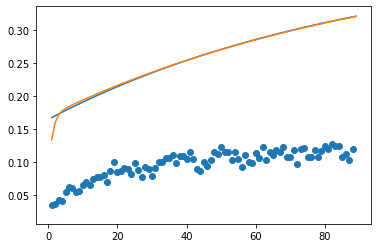

In [1091]:
compare_fits(test, 'Test')

In [ ]:
#get_thalf



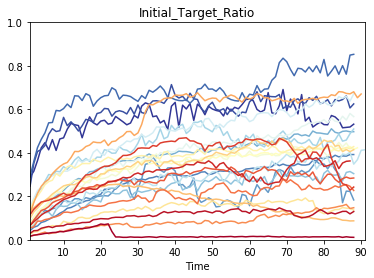

In [964]:
trait_name = 'Initial_Target_Ratio'

trait_list = get_trait_list(combined_df, ALKv3_FRAP_df, trait_name)

trait_array = np.array(trait_list)

ALKv3_FRAP_df.iloc[:,trait_array.argsort()].plot(legend=None, c=trait_list, cmap="RdYlBu_r");
plt.title(trait_name);
plt.ylim(0,1);
#Experiments where the focus is bright relative to the surrounding cytoplasm, tend to recover less fully

#Less obvious for ALKv3 - predicting a less apparent core-shell structure

In [988]:
trait_name = 'Initial_Target_Ratio'

trait_list = get_trait_list(combined_df, Ret_FRAP_df, trait_name)

trait_array = np.array(trait_list)

Ret_FRAP_df.iloc[:,trait_array.argsort()].plot(legend=None, c=trait_list, cmap="RdYlBu_r");
plt.title(trait_name);
plt.ylim(0,1);

IndexError: index 0 is out of bounds for axis 0 with size 0

In [940]:
trait_list

[267.1444285714286,
 189.50371428571427,
 241.95457142857143,
 164.2637142857143,
 1389.3212857142858,
 3821.516857142857,
 317.1311428571429,
 414.48742857142855,
 444.8925714285714,
 564.296,
 349.8482857142857,
 239.33885714285717,
 518.7865714285714,
 448.4744285714286,
 341.8777142857143,
 299.8747142857143,
 372.7982857142857,
 793.7318571428572,
 187.03985714285713,
 527.7967142857143,
 255.1235714285714,
 263.508,
 841.2961428571427,
 629.9572857142857,
 600.9218571428572,
 840.3682857142857,
 492.4461428571428,
 251.6747142857143,
 507.7967142857143,
 556.3372857142857,
 556.3372857142857,
 688.4491428571429,
 331.96628571428573]

In [945]:
trait_array = np.array(trait_list)
trait_array

array([ 267.14442857,  189.50371429,  241.95457143,  164.26371429,
       1389.32128571, 3821.51685714,  317.13114286,  414.48742857,
        444.89257143,  564.296     ,  349.84828571,  239.33885714,
        518.78657143,  448.47442857,  341.87771429,  299.87471429,
        372.79828571,  793.73185714,  187.03985714,  527.79671429,
        255.12357143,  263.508     ,  841.29614286,  629.95728571,
        600.92185714,  840.36828571,  492.44614286,  251.67471429,
        507.79671429,  556.33728571,  556.33728571,  688.44914286,
        331.96628571])

In [944]:
trait_array.sort()
trait_array

array([ 164.26371429,  187.03985714,  189.50371429,  239.33885714,
        241.95457143,  251.67471429,  255.12357143,  263.508     ,
        267.14442857,  299.87471429,  317.13114286,  331.96628571,
        341.87771429,  349.84828571,  372.79828571,  414.48742857,
        444.89257143,  448.47442857,  492.44614286,  507.79671429,
        518.78657143,  527.79671429,  556.33728571,  556.33728571,
        564.296     ,  600.92185714,  629.95728571,  688.44914286,
        793.73185714,  840.36828571,  841.29614286, 1389.32128571,
       3821.51685714])

In [946]:
trait_array.argsort()

array([ 3, 18,  1, 11,  2, 27, 20, 21,  0, 15,  6, 32, 14, 10, 16,  7,  8,
       13, 26, 28, 12, 19, 29, 30,  9, 24, 23, 31, 17, 25, 22,  4,  5],
      dtype=int64)

In [929]:
trait_name = 'Experiment'

In [923]:
combined_df.columns

Index(['File', 'Fixed', 'Protein', 'Bleach Frame', 'Filename', 'Experiment',
       'Initial_Focus', 'Initial_Spot', 'Initial_Control_Focus',
       'Initial_Control_Spot', 'Initial_Background', 't0_Focus', 't0_Spot',
       't0_Control_Focus', 't0_Control_Spot', 't0_Background', 'Final_Focus',
       'Final_Spot', 'Final_Control_Focus', 'Final_Control_Spot',
       'Final_Background'],
      dtype='object')

In [ ]:
#Convert categories to numeric code
index, labels = combined_df.Protein.factorize()
index

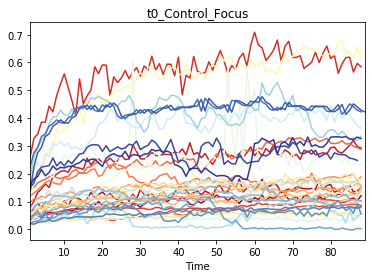

In [936]:
trait_name = 't0_Control_Focus'

trait_list = get_trait_list(combined_df, ALKv1_FRAP_df, trait_name)

ALKv1_FRAP_df.plot(legend=None, c=trait_list, cmap="RdYlBu_r");
plt.title(trait_name);

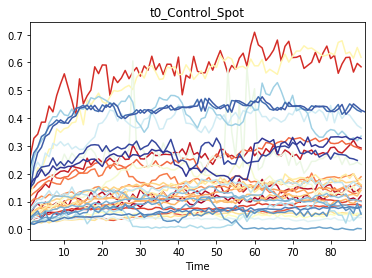

In [937]:
trait_name = 't0_Control_Spot'

trait_list = get_trait_list(combined_df, ALKv1_FRAP_df, trait_name)

ALKv1_FRAP_df.plot(legend=None, c=np.array(trait_list), cmap="RdYlBu_r");
plt.title(trait_name);

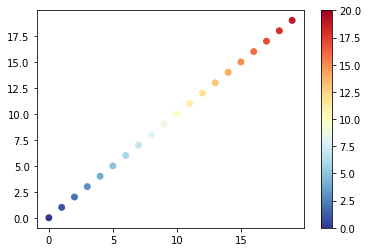

In [955]:
cm = plt.cm.get_cmap('RdYlBu_r')
xy = range(20)
z = xy
sc = plt.scatter(xy, xy, c=z, vmin=0, vmax=20, s=35, cmap=cm)
plt.colorbar(sc)
plt.show()


In [901]:
trait_array = np.array(trait_list)

In [903]:
print(trait_array.min(), trait_array.max())

164.2637142857143 3821.516857142857


AttributeError: 'Line2D' object has no property 'cmap'

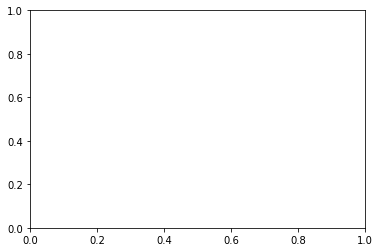

In [907]:
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.plot(ALKv1_FRAP_df, c=trait_list, cmap=cm);
plt.colorbar(sc)
plt.show()

AttributeError: 'Line2D' object has no property 'vmin'

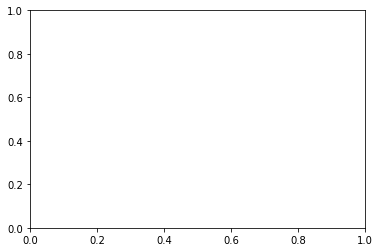

In [909]:
cm = plt.cm.get_cmap('RdYlBu')
sc = ALKv1_FRAP_df.plot(legend=None, c=trait_list, vmin=100, vmax=4000, cmap=cm);
plt.colorbar(sc)
plt.show()

In [831]:
## Plot mean recoveries

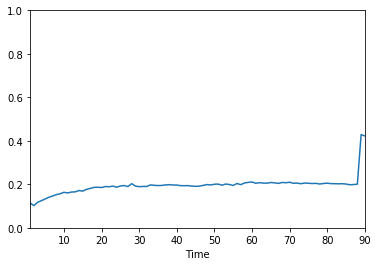

In [834]:
ALKv1_FRAP_df.mean(axis=1).plot()
plt.ylim(0,1);

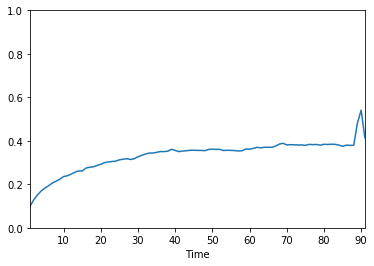

In [835]:
ALKv3_FRAP_df.mean(axis=1).plot()
plt.ylim(0,1);

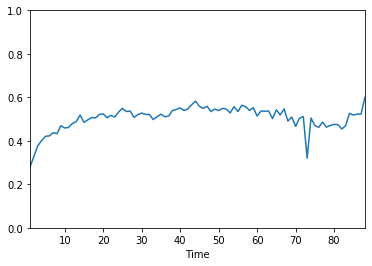

In [836]:
ALKv5_FRAP_df.mean(axis=1).plot()
plt.ylim(0,1);

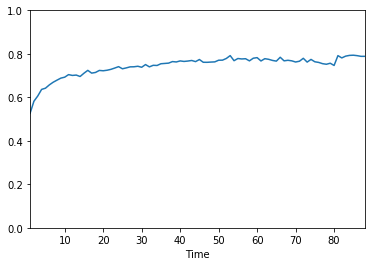

In [837]:
Ret_FRAP_df.mean(axis=1).plot()
plt.ylim(0,1);

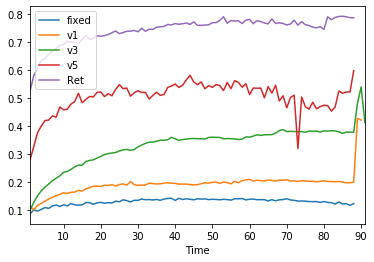

In [844]:
fixed_ALKv1_FRAP_df.mean(axis=1).plot();
ALKv1_FRAP_df.mean(axis=1).plot();
ALKv3_FRAP_df.mean(axis=1).plot();
ALKv5_FRAP_df.mean(axis=1).plot();
Ret_FRAP_df.mean(axis=1).plot();
plt.legend(['fixed', 'v1', 'v3', 'v5', 'Ret']);

In [766]:
file_list[36]

'EML4-ALKv1_FRAP_7_Results.csv'

In [767]:
t0_frames[36]

12

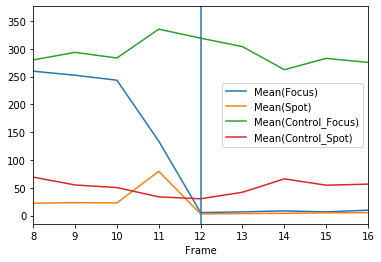

In [789]:
df_index = 32

df    = df_list[df_index]
title = file_list[df_index]
t0    = t0_frames[df_index]

sub = subtract_background(df)
norm = normalise(sub)
FRAP = get_FRAP(norm, ROI, t0)

sub.plot(x='Frame');
plt.axvline(t0);
plt.xlim(t0-4, t0+4);

In [ ]:
#df 36 t0 is 11 not 10.

In [742]:
#Aggregate Data from summary

FRAP_mean = pd.DataFrame()
FRAP_mean['Time']=range(100)

for df_index in combined_df[combined_df['Protein']=='ALKv1'].index:
#     print(df_index)
    
    df    = df_list[df_index]
    title = file_list[df_index]
    t0    = t0_frames[df_index]

    sub = subtract_background(df)
    norm = normalise(sub)
    FRAP = get_FRAP(norm, ROI, t0)
    FRAP.set_index(FRAP.Time, inplace=True)
    
#     FRAP_mean.merge(FRAP[ROI], how='outer', left_index=True, right_index=True)
    FRAP_mean.join(FRAP[ROI], how='outer')

FRAP_mean

ValueError: columns overlap but no suffix specified: Index(['Mean(Focus)'], dtype='object')

In [733]:
df_index = 12

df    = df_list[df_index]
title = file_list[df_index]
t0    = t0_frames[df_index]

sub = subtract_background(df)
norm = normalise(sub)
FRAP = get_FRAP(norm, ROI, t0)

#Index by Time
FRAP.set_index(FRAP.Time, inplace=True)
FRAP

,Mean(Focus),Mean(Spot),Mean(Control_Focus),Mean(Control_Spot),Frame,Time
Time,,,,,,
1,0.037962,0.217266,0.851152,0.989828,13,1
2,0.063910,0.331682,0.890419,0.994608,14,2
3,0.070456,0.379286,0.879428,0.949876,15,3
4,0.088801,0.437363,0.873316,0.912747,16,4
5,0.089144,0.442318,0.897720,0.881914,17,5
...,...,...,...,...,...,...
84,0.167706,0.762337,0.748876,0.880909,96,84
85,0.169417,0.747568,0.827443,0.840428,97,85
86,0.172428,0.757044,0.783733,0.875194,98,86


In [721]:
FRAP_mean.merge(FRAP, 'outer')


,Time,Mean(Focus),Mean(Spot),Mean(Control_Focus),Mean(Control_Spot),Frame
0,0,NaN,NaN,NaN,NaN,NaN
1,1,0.158106,0.415073,0.910809,1.220984,13.0
2,2,0.180885,0.511860,0.915965,1.073331,14.0
3,3,0.189738,0.527610,0.927648,1.028906,15.0
4,4,0.215026,0.522118,0.914793,0.996958,16.0
...,...,...,...,...,...,...
95,95,NaN,NaN,NaN,NaN,NaN
96,96,NaN,NaN,NaN,NaN,NaN
97,97,NaN,NaN,NaN,NaN,NaN
98,98,NaN,NaN,NaN,NaN,NaN
